In [49]:
# RNN

In [50]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import Tanh, Softmax, Linear, Relu, Sigmoid
from gympy.networks import RNN, DataSet
from gympy.optimizers import SGD, Adam, ExponentialDecay, TimeDecay
from gympy.loss import CategoricalCrossEntropy, MeanSquaredError

In [51]:
sin_wave = np.array([math.sin(0.5*x) for x in np.arange(200)])
cos_wave = np.array([math.cos(0.5*x) for x in np.arange(200)])
tan_wave = np.array([math.tan(0.5*x) for x in np.arange(200)])

wave = np.array([sin_wave, cos_wave])
wave.shape

(2, 200)

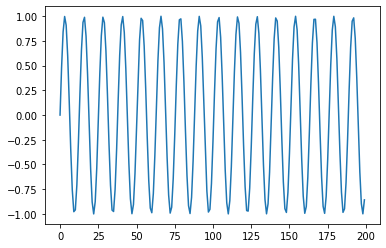

In [52]:
plt.plot(sin_wave)

(185, 2, 15)
(185, 2, 1)
185


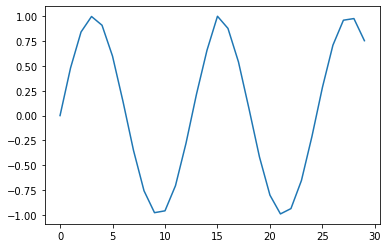

In [53]:
data = DataSet()
data.from_timeseries(wave,len_seq=15)
print(data.x.shape)
print(data.y.shape)
print(data.batch_size)
plt.plot(data.x[0,:,:].reshape(-1))

In [54]:
rnn = RNN(
    n_input=2, 
    n_hidden=50,
    n_output=2, 
    layer_hidden=Tanh,
    layer_output=Linear, 
    loss=MeanSquaredError(), 
    optimizer=Adam(
        learning_rate=0.01,
        decay = ExponentialDecay(rate=0.9),
        epsilon=1e-8,
        beta1=0.8,
        beta2=0.9,
    ),
    truncate=8
)

rnn.type


<RnnEnum.many_one: 'many_one'>

In [55]:
y,a =rnn.forward(data.x[0,:,:])
print(y.shape, a.shape)

(2, 15) (50, 15)


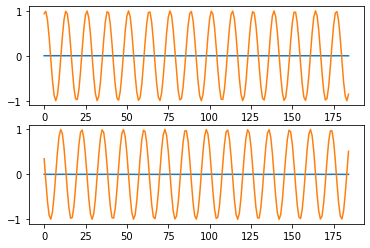

In [56]:
y_pred = rnn.predict_batch(data.x)

fig, ax = plt.subplots(2,1)

ax[0].plot(y_pred[:,0])
ax[0].plot(data.y[:,0,:])
ax[1].plot(y_pred[:,1])
ax[1].plot(data.y[:,1,:])


In [57]:
data.x[0,:,:]

array([[ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
         0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
        -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ],
       [ 1.        ,  0.87758256,  0.54030231,  0.0707372 , -0.41614684,
        -0.80114362, -0.9899925 , -0.93645669, -0.65364362, -0.2107958 ,
         0.28366219,  0.70866977,  0.96017029,  0.97658763,  0.75390225]])

In [58]:
rnn.get_loss(data.x[0,:,:],data.y[0,:,:])

0.4982456804101022

0 cost 0.16931090045605252 iter 186
1 cost 0.014555899758848325 iter 371
2 cost 0.059425983640366886 iter 556
3 cost 0.0011994697537046225 iter 741
4 cost 0.025499374859632464 iter 926


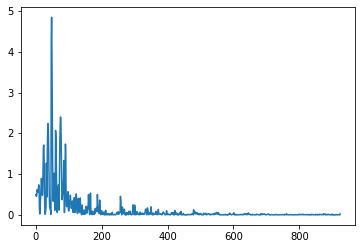

In [59]:
rnn.train_dataset(data,show=1, n_epochs=5)
plt.plot(rnn.cost)

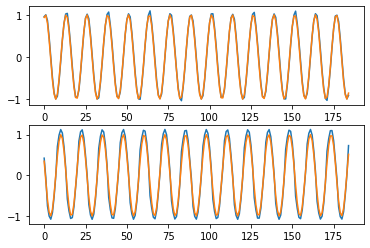

In [60]:
y_pred = rnn.predict_batch(data.x)

fig, ax = plt.subplots(2,1)

ax[0].plot(y_pred[:,0])
ax[0].plot(data.y[:,0,:])
ax[1].plot(y_pred[:,1])
ax[1].plot(data.y[:,1,:])
